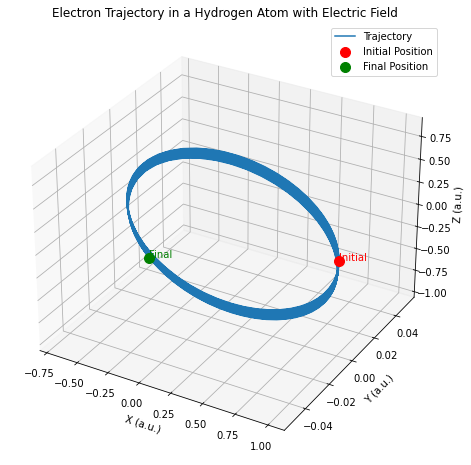

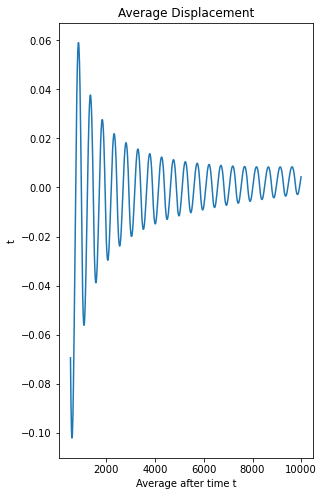

0.00430782419554418
0.0007853981633974483


In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Constants in atomic units
e = 1.0  # Elementary charge
m = 1.0  # Mass of electron
k = 1.0  # Coulomb constant (1 / (4 * pi * epsilon_0))
#dt = 1e-3  # Time step (atomic units)
dt = 1e-1 # Time step (atomic units)
#total_time = 100.0  # Total simulation time (atomic units)
total_time = 100.0  # Total simulation time (atomic units)
num_steps = int(total_time / dt)
E_field = np.array([0.001, 0.0, 0.0])  # Small electric field (atomic units)

# Initial conditions
initial_r = np.array([1.0, 0.0, 0.0])  # Initial position at Bohr radius (atomic units)
r = np.copy(initial_r)
v = np.array([0.0, 0.0, 0.901])  # Initial velocity (atomic units)

# Function to calculate the force on the electron
def calculate_force(r):
    r_mag = np.linalg.norm(r)
    F_coulomb = -k * r / r_mag**3
    F_electric = -e * E_field
    return F_coulomb + F_electric

# Function to calculate acceleration
def acceleration(r):
    return calculate_force(r) / m

# RK4 method for updating position and velocity
def rk4_step(r, v, dt):
    k1_v = acceleration(r) * dt
    k1_r = v * dt
    
    k2_v = acceleration(r + 0.5 * k1_r) * dt
    k2_r = (v + 0.5 * k1_v) * dt
    
    k3_v = acceleration(r + 0.5 * k2_r) * dt
    k3_r = (v + 0.5 * k2_v) * dt
    
    k4_v = acceleration(r + k3_r) * dt
    k4_r = (v + k3_v) * dt
    
    r_next = r + (k1_r + 2*k2_r + 2*k3_r + k4_r) / 6
    v_next = v + (k1_v + 2*k2_v + 2*k3_v + k4_v) / 6
    
    return r_next, v_next

# Arrays to store the trajectory and displacements
trajectory = np.zeros((num_steps, 3))
displacements = np.zeros((num_steps, 3))
trajectory[0] = r

# Simulation loop
for i in range(1, num_steps):
    r, v = rk4_step(r, v, dt)
    trajectory[i] = r
    displacements[i] = r - initial_r
    
# Plot the trajectory
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], label='Trajectory')

# Highlight initial and final positions
initial_pos = trajectory[0]
final_pos = trajectory[-1]

#L = []
#t = [i/dt for i in range(1,len(trajectory))]
#t = [i for i in range(1,10)]

#for i in range(1,len(trajectory) ):
#for i in range(1,10):
    #c = []
    #for j in range(len(trajectory[:i])):
        #c.append(np.linalg.norm(trajectory[:i][j]))
    #L.append(np.mean(c))

#fig10 = plt.figure(figsize=(10, 8))
#ax10 = fig10.add_subplot(122)
#ax10.plot(t, L, label='average')
#ax10.set_xlabel('average over period t')
#ax10.set_ylabel('t')
#ax10.set_title('traj')

L2 = []
t2 = [i/dt for i in range(1,len(displacements))]
#t = [i for i in range(1,10)]

for i in range(1,len(displacements) ):
#for i in range(1,10):
    c2 = []
    for j in range(len(displacements[:i])):
        c2.append(np.linalg.norm(displacements[:i][j])-1)
    L2.append(np.mean(c2))


fig11 = plt.figure(figsize=(10, 8))
ax11 = fig11.add_subplot(122)
ax11.plot(t2[52:], L2[52:], label='average')
ax11.set_xlabel('Average after time t')
ax11.set_ylabel('t')
ax11.set_title('Average Displacement')


ax.scatter(initial_pos[0], initial_pos[1], initial_pos[2], color='red', s=100, label='Initial Position')
ax.scatter(final_pos[0], final_pos[1], final_pos[2], color='green', s=100, label='Final Position')

ax.text(initial_pos[0], initial_pos[1], initial_pos[2], 'Initial', color='red')
ax.text(final_pos[0], final_pos[1], final_pos[2], 'Final', color='green')

# Set labels and title
ax.set_xlabel('X (a.u.)')
ax.set_ylabel('Y (a.u.)')
ax.set_zlabel('Z (a.u.)')
ax.set_title('Electron Trajectory in a Hydrogen Atom with Electric Field')
ax.legend()

plt.show()

# Calculate the time-averaged displacement
#time_averaged_displacement = np.mean(displacements, axis=0)
#print(f"Time-averaged displacement: {time_averaged_displacement} a.u.")
#time_averaged_traj = np.mean(trajectory, axis=0)
#print(f"Time-averaged displacement: {time_averaged_traj} a.u.")

# Calculate the polarizability
E_field_magnitude = np.linalg.norm(E_field)
#print(np.linalg.norm(time_averaged_displacement))
#print(np.linalg.norm(time_averaged_traj))
#polarizability = (4*np.pi*(np.linalg.norm(time_averaged_displacement) / E_field_magnitude))#/1000
print(L2[-1])
print(E_field_magnitude/4*np.pi)
#polarizability = (4*np.pi*L2[-1] / E_field_magnitude)
#polarizability = (4*np.pi*(1-np.linalg.norm(time_averaged_traj)) / E_field_magnitude)
#print(f"Polarizability: {polarizability} a.u.")
